# Decision Tree and Random Forest Classifier Case Study 03: Employee Attrition Rate analysis

This project highlights the modelling, evaluating of logistic regression on attrition problem happening in a reputed company. The project is divided into below categories for better understanding purposes.

1. Problem Statement
2. Collecting the data
3. Exploratory data analysis
4. Feature Engineering
5. Building the model
6. Performance evaluation
7. Prepuning and remodelling

## 1. Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since we are one of the star analysts at the firm, this project has been given to us by the company HR.

**Goal of the case study is to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay**.

1. To perform Univariate and Multivariate analysis for getting the insights about the data
2. To apply decision tree model to the attrition problem and finding who is causing the attrition to the company

## 2. Collecting and loading the data

The data set is called "Attrition_data.csv" file. This file has 24 columns also called as features and has 4410 rows also called as records. The features names are as follows:

	
	
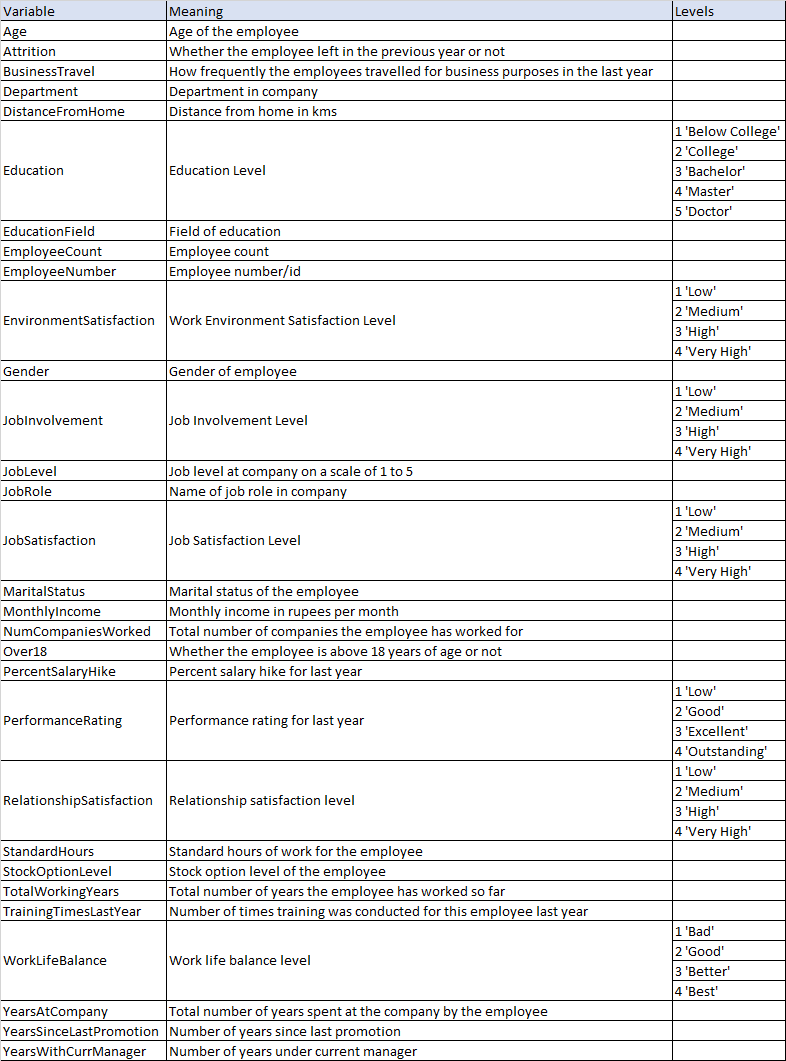

The dataset and data dictionary sources can be acquried from below link https://drive.google.com/drive/folders/1rgvuvFC7IxwJVU18_jfakGuUpIWfxEaH

## 3. Exploratory Data Analysis

In [87]:
#Importing required libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
#function for crossvalidate score
from sklearn.model_selection import cross_validate
#to find the best 
from sklearn.model_selection import GridSearchCV

In [3]:
#Load the csv file using read_csv function
data = pd.read_csv("Attrition_dataset.csv")
#checking the dataframe using head() function
data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [4]:
#check the columns of data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
#check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Observations:<br>

#### Numerical Features: <br>
> 1. Age
> 2. DistanceFromHome
> 3. Education
> 4. Employee Count 
> 5. EmployeeID
> 6. JobLevel
> 7. MonthlyIncome
> 8. NumCompaniesWorked
> 9. PercentSalaryHiked
> 10. TotalWorkingHours
> 11. TrainingTimesLastYear
> 12. YearsAtCompany
> 13. YearsSinceLastPromotion
> 14. YearsWithCurrManager

#### Categorical Features:<br>
> 1. Attrition
> 2. BusinessLevel
> 3. Department
> 4. Education Field
> 5. Gender
> 6. JobRole
> 7. MaritalStatus
> 8. Over18


1. Target value(attrition) is a object and we need to convert it to numerical
2. Seems like missing values are there in dataset

In [6]:
#Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Observation:<br>
There are 19 missing values in NumCompaniesWorked and 9 missing values in TotalWorkingHours

In [7]:
#checking the datatype of each column
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [8]:
#have a look on descriptive statistics of dataset
data.describe().T

count          mean           std      min  \
Age                      4410.0     36.923810      9.133301     18.0   
DistanceFromHome         4410.0      9.192517      8.105026      1.0   
Education                4410.0      2.912925      1.023933      1.0   
EmployeeCount            4410.0      1.000000      0.000000      1.0   
EmployeeID               4410.0   2205.500000   1273.201673      1.0   
JobLevel                 4410.0      2.063946      1.106689      1.0   
MonthlyIncome            4410.0  65029.312925  47068.888559  10090.0   
NumCompaniesWorked       4391.0      2.694830      2.498887      0.0   
PercentSalaryHike        4410.0     15.209524      3.659108     11.0   
StandardHours            4410.0      8.000000      0.000000      8.0   
StockOptionLevel         4410.0      0.793878      0.851883      0.0   
TotalWorkingYears        4401.0     11.279936      7.782222      0.0   
TrainingTimesLastYear    4410.0      2.799320      1.288978      0.0   
YearsAtCompany           4410.0      7.008163      6.125135      0.0   
YearsSinceLastPromotion  4410.0      2.187755      3.221699      0.0   
YearsWithCurrManager     4410.0      4.123129      3.567327      0.0   

                              25%      50%       75%       max  
Age                         30.00     36.0     43.00      60.0  
DistanceFromHome             2.00      7.0     14.00      29.0  
Education                    2.00      3.0      4.00       5.0  
EmployeeCount                1.00      1.0      1.00       1.0  
EmployeeID                1103.25   2205.5   3307.75    4410.0  
JobLevel                     1.00      2.0      3.00       5.0  
MonthlyIncome            29110.00  49190.0  83800.00  199990.0  
NumCompaniesWorked           1.00      2.0      4.00       9.0  
PercentSalaryHike           12.00     14.0     18.00      25.0  
StandardHours                8.00      8.0      8.00       8.0  
StockOptionLevel             0.00      1.0      1.00       3.0  
TotalWorkingYears            6.00     10.0     15.00      40.0  
TrainingTimesLastYear        2.00      3.0      3.00       6.0  
YearsAtCompany               3.00      5.0      9.00      40.0  
YearsSinceLastPromotion      0.00      1.0      3.00      15.0  
YearsWithCurrManager         2.00      3.0      7.00      17.0

#### Observations:<br>
1. EmployeeID, EmployeeCount, Over18 and StandardHours columns has nothing to do with attrition prediction
2. MonthlyIncome of an employee could be the one of reasons behind the employee attrition rate
3. Age column seems normally distributed

In [9]:
#Lets divide the above data features into two subsets
#categorical and numerical. For this we will create function

def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [10]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Attrition"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

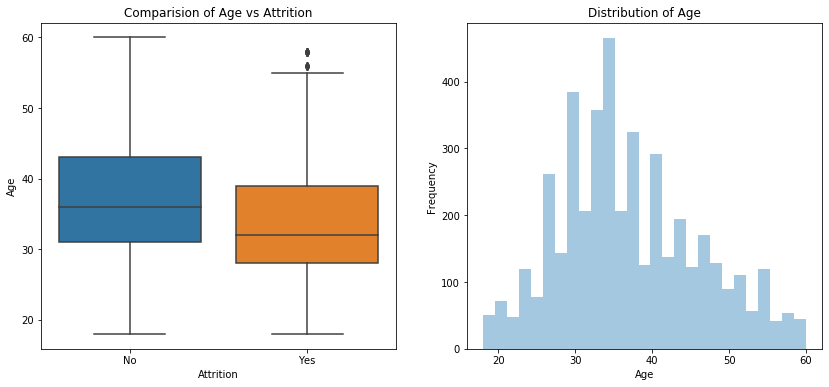

In [11]:
#checking how age is distributed
NumericalVariables_targetPlots(data,segment_by="Age")

#### Observations:<br>
1. We observe from the above plot that minimum age is 18 and maximum age reaches to 60
2. From the box plot, it seems like majority of employees who left the company are below 40 years. This can be due to younger people have got better oppurtunities
3. People who did not left the company/stayed in company are above 40 years. This might be due to that people who are in middle and older aged people thought that leaving the company would not effect their career and they must have thought about their familiy living.

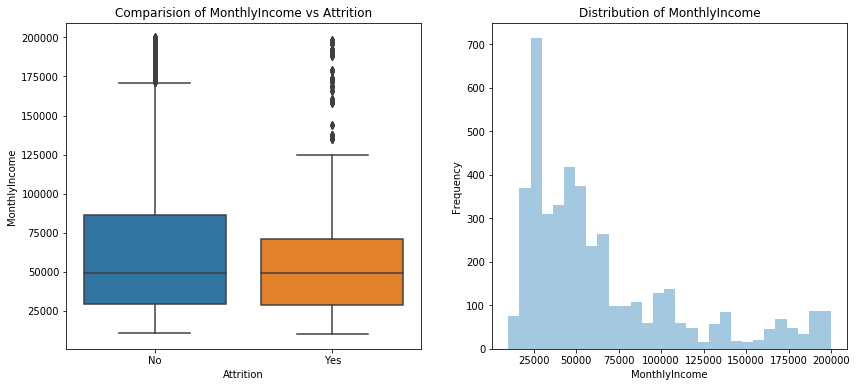

In [12]:
NumericalVariables_targetPlots(data,segment_by="MonthlyIncome")

#### Observation:<br>
1. Employees who are getting less income are tend to leave the company than employees who are getting paid with high salary
2. From box plot, the monthlyincome has more outliers. This could be one of reasons behind the employee high attrition rate.

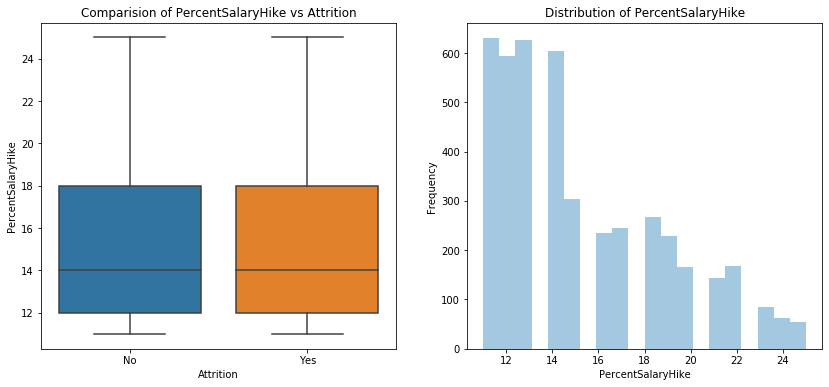

In [13]:
NumericalVariables_targetPlots(data,segment_by="PercentSalaryHike")

#### Observations:<br>

People who are receiving less salary hike are more when compared to people who are receiving high salary hike.

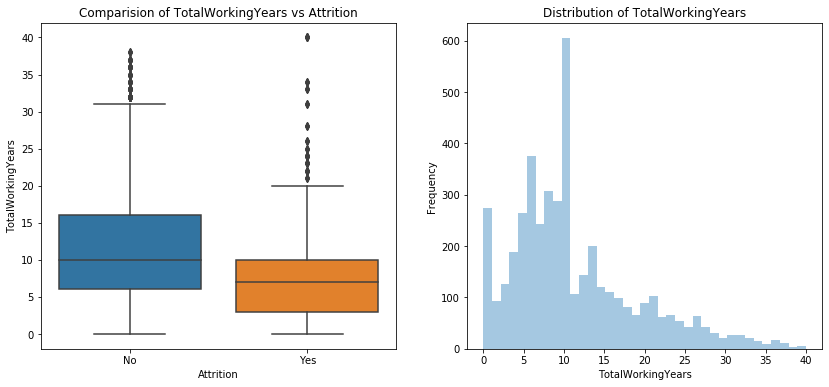

In [14]:
NumericalVariables_targetPlots(data,segment_by="TotalWorkingYears")

#### Observations:<br>
1. People who have total working experience of less than 10 years are more to leave the company than people who have more than 10 years of working experience. 
2. Since highly experienced people have responsibilites over them, they tend to give up on leaving the company.

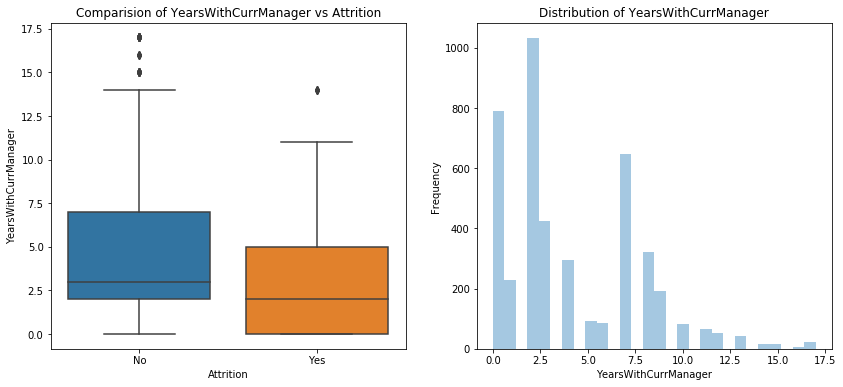

In [15]:
NumericalVariables_targetPlots(data,segment_by="YearsWithCurrManager")

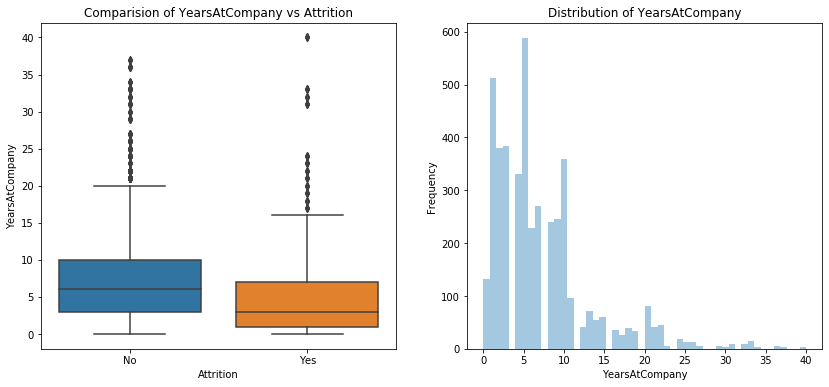

In [16]:
NumericalVariables_targetPlots(data,segment_by="YearsAtCompany")

#### Observation:

1. Employees with less than 10 years of company experience have most likely left the company

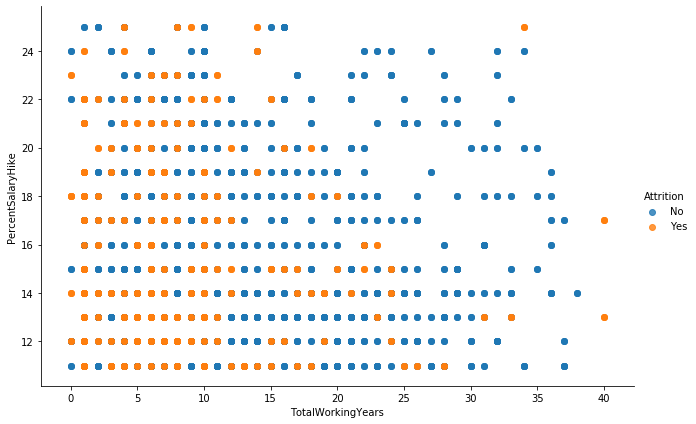

In [17]:
#Checking the percentsalaryhike vs total working years on basis of attrition

sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=data,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

#### Observations:<br>
1. There is no linear relationship between working years and salary hike of employees with less working years.
2. Attrition is not seen amomg the employee's having more than 20 years of experience irrespective of salary hike they have received.
3. Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike.

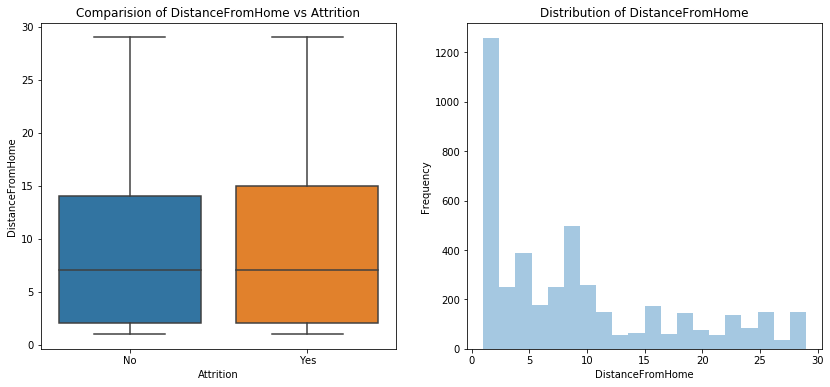

In [19]:
NumericalVariables_targetPlots(data,segment_by="DistanceFromHome")

#### Observations:<br>
From the above graphs, it can be inferred that people living in locations nearby to office are more and they are the one who stayed at the company. As distance increases, the attrition rate also increases.

In [20]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(data.JobLevel,data.Attrition)

Attrition    No  Yes
JobLevel            
1          1377  252
2          1317  285
3           558   96
4           267   51
5           180   27

In [21]:
#calculating the percentage of people having different job involvement rate
round(data.JobLevel.value_counts()/data.shape[0] * 100,2)

1    36.94
2    36.33
3    14.83
4     7.21
5     4.69
Name: JobLevel, dtype: float64

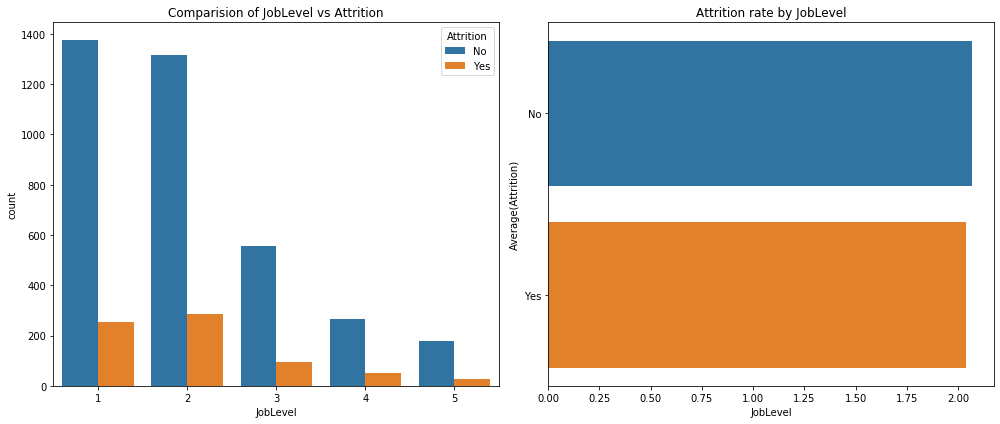

In [22]:
CategoricalVariables_targetPlots(data, "JobLevel")

#### Observations:<br>
1. From the above plot, we can observe that employees with joblevel 1 and 2 are the one who left the company

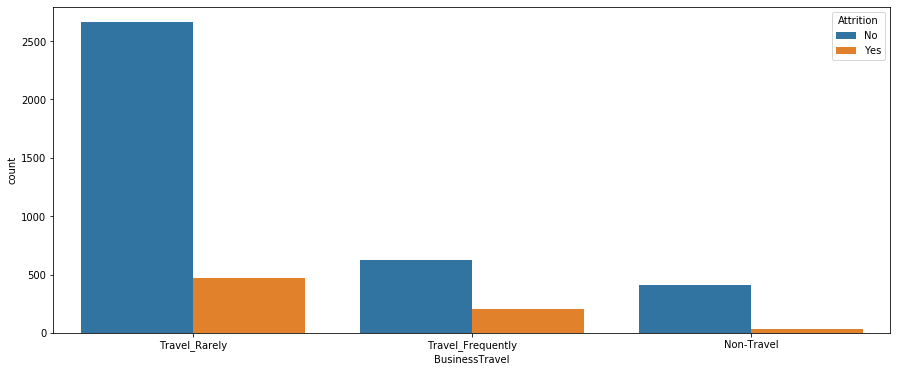

In [23]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="BusinessTravel", hue="Attrition", data=data)

#### Observation:<br>
There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

In [24]:
#Check the how many employees are there per department
data.Department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

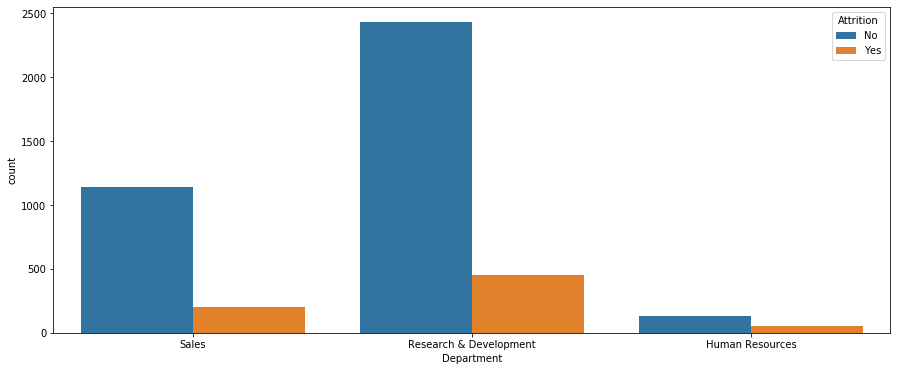

In [25]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="Department", hue="Attrition", data=data)

#### Observations:<br>
On comparing departmentwise,we can conclude that attrition levels are not appreciable in R & D where 67 % have recorded no attrition.

In [26]:
#Check the how many employees are there per gender
data.Gender.value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

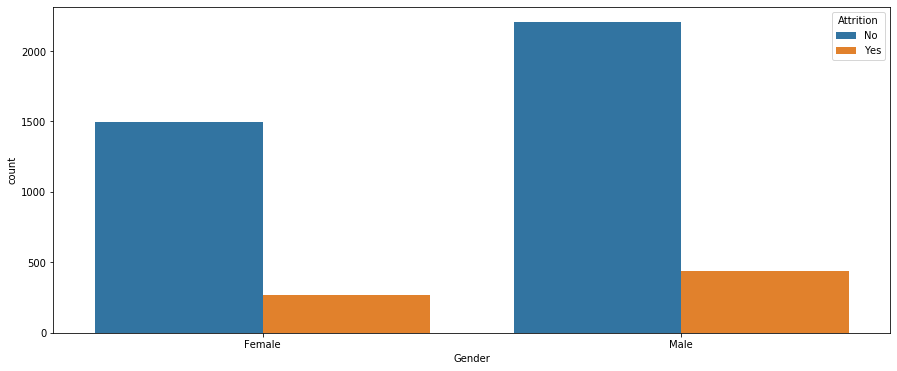

In [27]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="Gender", hue="Attrition", data=data)

#### Observations:<br>
Male employees tend to leave company when compared to female.

In [29]:
#Check the how many employees are there per marital status
data.MaritalStatus.value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

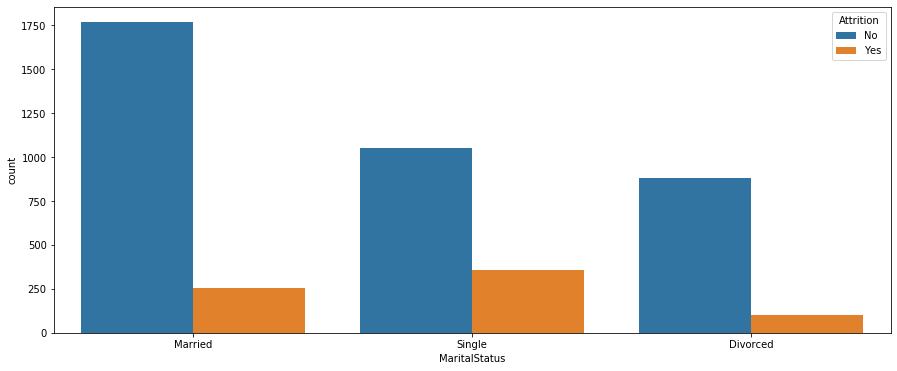

In [30]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="MaritalStatus", hue="Attrition", data=data)

#### Observation:<br>
1. Employees who are single tend to leave the company more when compared to who are married and divorced.
2. It sees that Gender is not a strong indicator of attrition

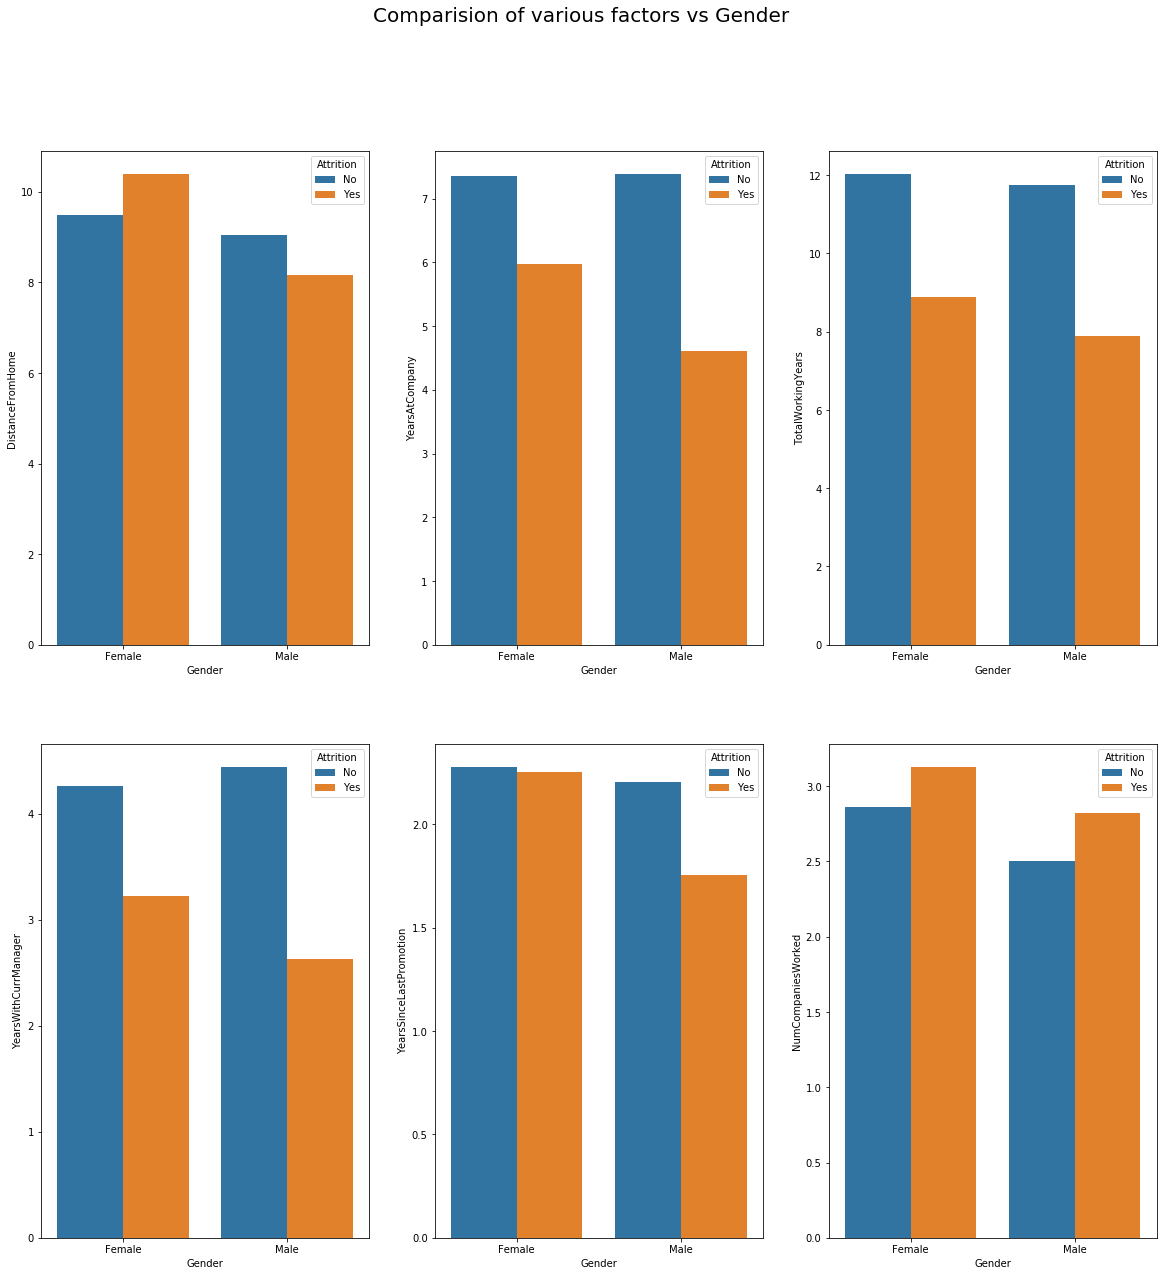

In [31]:
#Comparision of various factors with gender
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(data['Gender'],data['DistanceFromHome'],hue = data['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(data['Gender'],data['YearsAtCompany'],hue = data['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(data['Gender'],data['TotalWorkingYears'],hue = data['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(data['Gender'],data['YearsWithCurrManager'],hue = data['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(data['Gender'],data['YearsSinceLastPromotion'],hue = data['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(data['Gender'],data['NumCompaniesWorked'],hue = data['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

#### Observations:<br>
1. Distance from home matters to women employees more than men.
2. Female employes are spending more years in one company compare to their counterpart.
3. Female employes are more inclined to switch than male employees

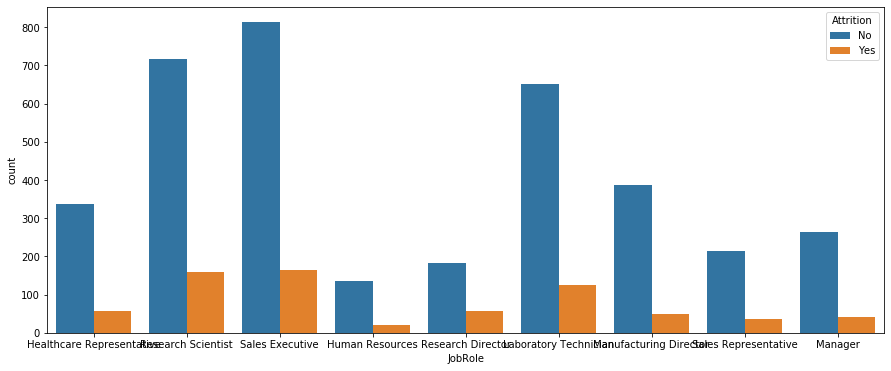

In [32]:
#Comparision of jobrole by attrition
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="JobRole", hue="Attrition", data=data)

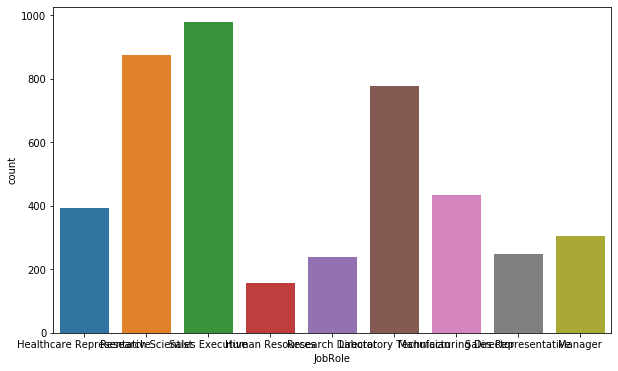

In [33]:
#Comparision of jobrole by attrition
fig = plt.figure(1, figsize=(10,6))
sns.countplot(x="JobRole",data=data)

#### Observation:<br>
1. Jobs held by the employee is maximum in Sales Executive, then Research Scientist , then Laboratory Technician
2. People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources

#### Inferences:<br>
Variables that wont contribute to Attrition are:<br>
> 1. EmployeeID
> 2. EmployeeCount
> 3. Over18
> 4. StandardHours

## 4. Feature Engineering

1. Segregate the numerical and Categorical variables
2. Convert Categorical variables to numerical variables

In [35]:
#COPying the dataframe without effecting original dataframe
data2 = data.copy()

In [36]:
#Removing unuseful features
data2.drop(['EmployeeCount','EmployeeID','StandardHours','Over18','StockOptionLevel'], axis=1, inplace=True)

In [37]:
data2.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  Gender  JobLevel                    JobRole  \
0          2  Life Sciences  Female         1  Healthcare Representative   
1          1  Life Sciences  Female         1         Research Scientist   
2          4          Other    Male         4            Sales Executive   
3          5  Life Sciences    Male         3            Human Resources   
4          1        Medical    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0       Married         131160                 1.0                 11   
1        Single          41890                 0.0                 23   
2       Married         193280                 1.0                 15   
3       Married          83210                 3.0                 11   
4        Single          23420                 4.0                 12   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [38]:
#capturing the data types of variables and storing in dictionary
dict(data2.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'Gender': dtype('O'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'NumCompaniesWorked': dtype('float64'),
 'PercentSalaryHike': dtype('int64'),
 'TotalWorkingYears': dtype('float64'),
 'TrainingTimesLastYear': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [39]:
#segregating the entire dataframe based on categorical and numerical datatypes
numeric_variable_names  = [key for key in dict(data2.dtypes) if dict(data2.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(data2.dtypes) if dict(data2.dtypes)[key] in ["object"]]

In [40]:
#Storing the above variables in two new datasets
data2_num = data2[numeric_variable_names]

In [41]:
data2_cat = data2[categorical_variable_names]

In [42]:
#check if numerical dataset has any missing values
data2_num.isnull().sum()

Age                         0
DistanceFromHome            0
Education                   0
JobLevel                    0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [43]:
#treating missing values by filling them with mean value
data2_num['TotalWorkingYears']=data2_num['TotalWorkingYears'].fillna(value=data2_num['TotalWorkingYears'].mean())
data2_num['NumCompaniesWorked'] = data2_num['NumCompaniesWorked'].fillna(value=data2_num['NumCompaniesWorked'].mean())

In [44]:
data2_num.isnull().sum()

Age                        0
DistanceFromHome           0
Education                  0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [47]:
label_encoder = preprocessing.LabelEncoder()
data2_cat['Attrition'] = label_encoder.fit_transform(data2_cat['Attrition'])
data2_cat['BusinessTravel'] = label_encoder.fit_transform(data2_cat['BusinessTravel'])
data2_cat['Department'] = label_encoder.fit_transform(data2_cat['Department'])
data2_cat['EducationField'] = label_encoder.fit_transform(data2_cat['EducationField'])
data2_cat['JobRole'] = label_encoder.fit_transform(data2_cat['JobRole'])
data2_cat['MaritalStatus'] = label_encoder.fit_transform(data2_cat['MaritalStatus'])

In [49]:
data2_cat['Gender'] = label_encoder.fit_transform(data2_cat['Gender'])

In [50]:
data2_cat.head()

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0          0               2           2               1       0        0   
1          1               1           1               1       0        6   
2          0               1           1               4       1        7   
3          0               0           1               1       1        1   
4          0               2           1               3       1        7   

   MaritalStatus  
0              1  
1              2  
2              1  
3              1  
4              2

In [51]:
data_final = pd.concat([data2_num, data2_cat], axis=1)

In [52]:
data_final.head()

Age  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0   51                 6          2         1         131160   
1   31                10          1         1          41890   
2   32                17          4         4         193280   
3   38                 2          5         3          83210   
4   32                10          1         1          23420   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                 1.0                 11                1.0   
1                 0.0                 23                6.0   
2                 1.0                 15                5.0   
3                 3.0                 11               13.0   
4                 4.0                 12                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  Attrition  BusinessTravel  Department  \
0                     0          0               2           2   
1                     4          1               1           1   
2                     3          0               1           1   
3                     5          0               0           1   
4                     4          0               2           1   

   EducationField  Gender  JobRole  MaritalStatus  
0               1       0        0              1  
1               1       0        6              2  
2               4       1        7              1  
3               1       1        1              1  
4               3       1        7              2

## 5. Building the model

In [53]:
features =  list(data_final.columns.difference(["Attrition"]))

In [54]:
features

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [55]:
#seperating the target and predictors

X = data_final[features]
y = data_final[["Attrition"]]


print(X.shape, y.shape)

(4410, 18) (4410, 1)


In [57]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [58]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

0    0.838678
1    0.161322
Name: Attrition, dtype: float64

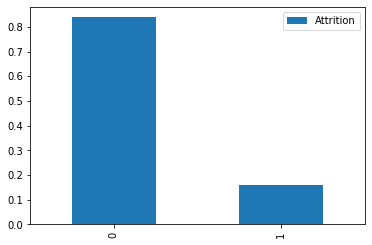

In [59]:
#Checks
#Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [60]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

0    0.839002
1    0.160998
Name: Attrition, dtype: float64

In [61]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [62]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [63]:
scores['test_score'].mean()

0.8493692729723634

Average accuracy of pipeline with Decision Tree Classifier is 84.93%

**Decision Tree is a greedy alogithm it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree**

Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters

> Declare a hyper-parameters to fine tune the Decision Tree Classifier

In [64]:

decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [65]:
pipelines['clf']

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=100,
                                        splitter='best'))],
         verbose=False)

**Fit and tune models with cross-validation**

Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to tune our models with cross-validation.
> We are doing 5 fold cross validation

In [66]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [67]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=3,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                         

In [68]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__max_features': 8,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [69]:
#Display the best score for the fitted model
clf_model.best_score_

0.9209548236849144

In [70]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [71]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

**Model performance and evaluation of test data**

In [72]:
tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [73]:
tree_test_pred.head()

actual  predicted
2778       0          0
410        0          0
3423       0          0
2170       0          0
4341       0          0

In [74]:

#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [75]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [76]:
tree_test_pred.head()

actual  predicted  predicted_prob
2778       0          0             0.0
410        0          0             0.0
3423       0          0             0.0
2170       0          0             0.0
4341       0          0             0.0

In [77]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [78]:
tree_test_pred.head()

actual  predicted  predicted_prob  actual_left  predicted_left
2778       0          0             0.0            0               0
410        0          0             0.0            0               0
3423       0          0             0.0            0               0
2170       0          0             0.0            0               0
4341       0          0             0.0            0               0

In [79]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=505e312090b028b55191dfb695378493ced1d1d078f1ac6724532a781f22932d
  Stored in directory: c:\users\shanmukeswar\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [80]:
import pydotplus as pdot

In [81]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [82]:
#write the dot data
dot_data = StringIO()

#export the decision tree along with the feature names into a dot file format

export_graphviz(clf_best_model,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = X_train.columns.values,class_names = ["No","Yes"])

#make a graph from dot file 
graph = pdot.graph_from_dot_data(dot_data.getvalue())

In [85]:
conda install pydot graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Shanmukeswar\anaconda3

  added / updated specs:
    - graphviz
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydot-1.4.1                |           py37_0          43 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydot              pkgs/main/win-64::pydot-1.4.1-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0




conda-4.8.3      

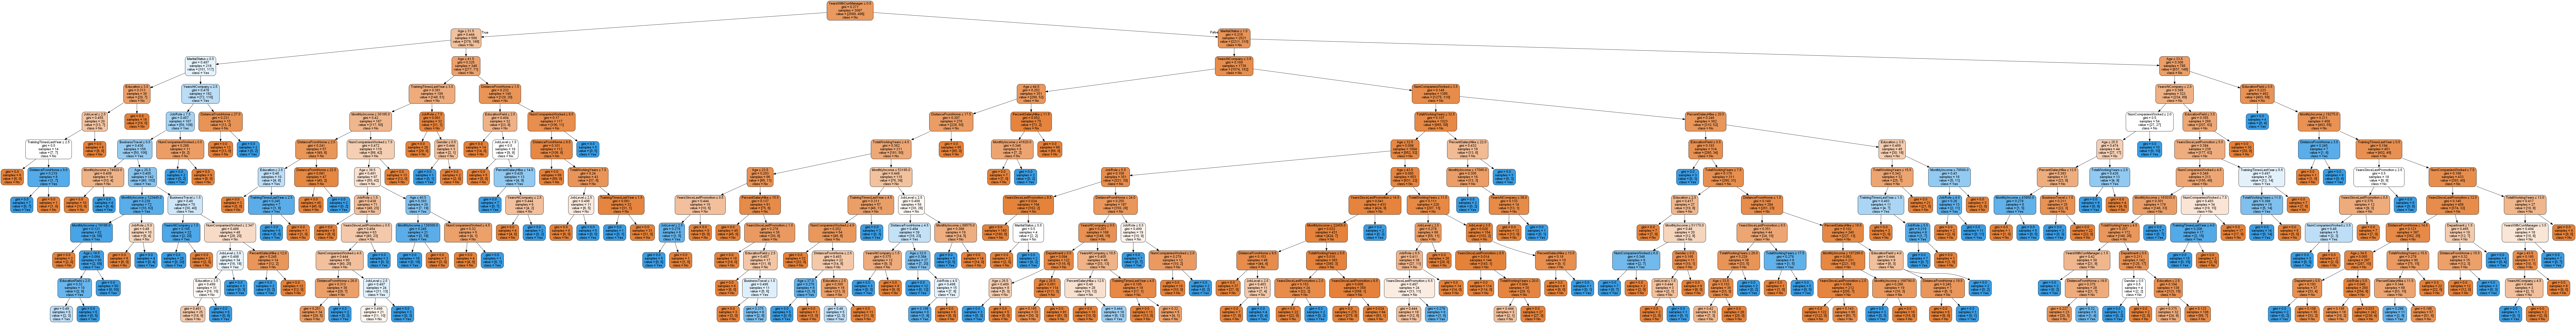

In [86]:
Image(graph.create_png())

In [88]:
text_representation = tree.export_text(clf_best_model)
print(text_representation)

|--- feature_17 <= 0.50
|   |--- feature_0 <= 31.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- feature_4 <= 3.50
|   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |--- feature_14 <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_14 >  2.50
|   |   |   |   |   |   |--- feature_3 <= 9.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  9.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- feature_15 <= 2.50
|   |   |   |   |--- feature_8 <= 7.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_10 <= 74920.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_10 >  74920.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |

In [89]:
#Save the above text representation
with open("decision_tree_2.dot", "w") as f:
    f.write(text_representation)

In [90]:
#Print the accuracy
print(clf_best_model.score(X,y))

0.9589569160997733


## 6. Remodelling with random forest

In [91]:
#lets take independent variables seperately to find which predictor is important for prediciting the survival of passenger.
features =  list(data_final.columns.difference(["Attrition"]))

#Develop the model
rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)

#fit the model with above defined features
rf_model.fit(X=data_final[features], y=data_final['Attrition'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
#Printing the oob score
print("OOB Score: ", rf_model.oob_score_)

OOB Score:  1.0


In [93]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

Age 0.0998591339334747
BusinessTravel 0.02819437726802837
Department 0.026877923939574576
DistanceFromHome 0.07210201787970516
Education 0.04215528500155987
EducationField 0.04328511009415453
Gender 0.01936837778086017
JobLevel 0.039478806198041394
JobRole 0.058482817849381946
MaritalStatus 0.040882527943257786
MonthlyIncome 0.09910664498942366
NumCompaniesWorked 0.05794116678222913
PercentSalaryHike 0.06850646779289715
TotalWorkingYears 0.08680561596961393
TrainingTimesLastYear 0.04717627422263663
YearsAtCompany 0.07006609520622326
YearsSinceLastPromotion 0.0446725413641945
YearsWithCurrManager 0.05503881578474332


In [94]:
#Assign the data to variables
X = data_final[['MonthlyIncome','Age','TotalWorkingYears']]
y = data_final['Attrition']

#Compute the shapes
print("Shape of X: ",X.shape)
print()
print("Shape of y: ",y.shape)

Shape of X:  (4410, 3)

Shape of y:  (4410,)


In [125]:
#build the model
tree_model_two = DecisionTreeClassifier(max_depth=15, random_state=2314)

#fit the model with training data
tree_model_two.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2314, splitter='best')

In [126]:
text_representation = tree.export_text(tree_model_two)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- feature_1 <= 33.50
|   |   |--- feature_0 <= 112610.00
|   |   |   |--- feature_0 <= 23140.00
|   |   |   |   |--- feature_0 <= 20325.00
|   |   |   |   |   |--- feature_0 <= 19425.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  19425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  20325.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  23140.00
|   |   |   |   |--- feature_1 <= 23.50
|   |   |   |   |   |--- feature_1 <= 18.50
|   |   |   |   |   |   |--- feature_0 <= 25995.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  25995.00
|   |   |   |   |   |   |   |--- feature_0 <= 33490.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  33490.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 36400.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  36

In [127]:
#Save the above text representation
with open("decision_tree_final_RF.dot", "w") as f:
    f.write(text_representation)

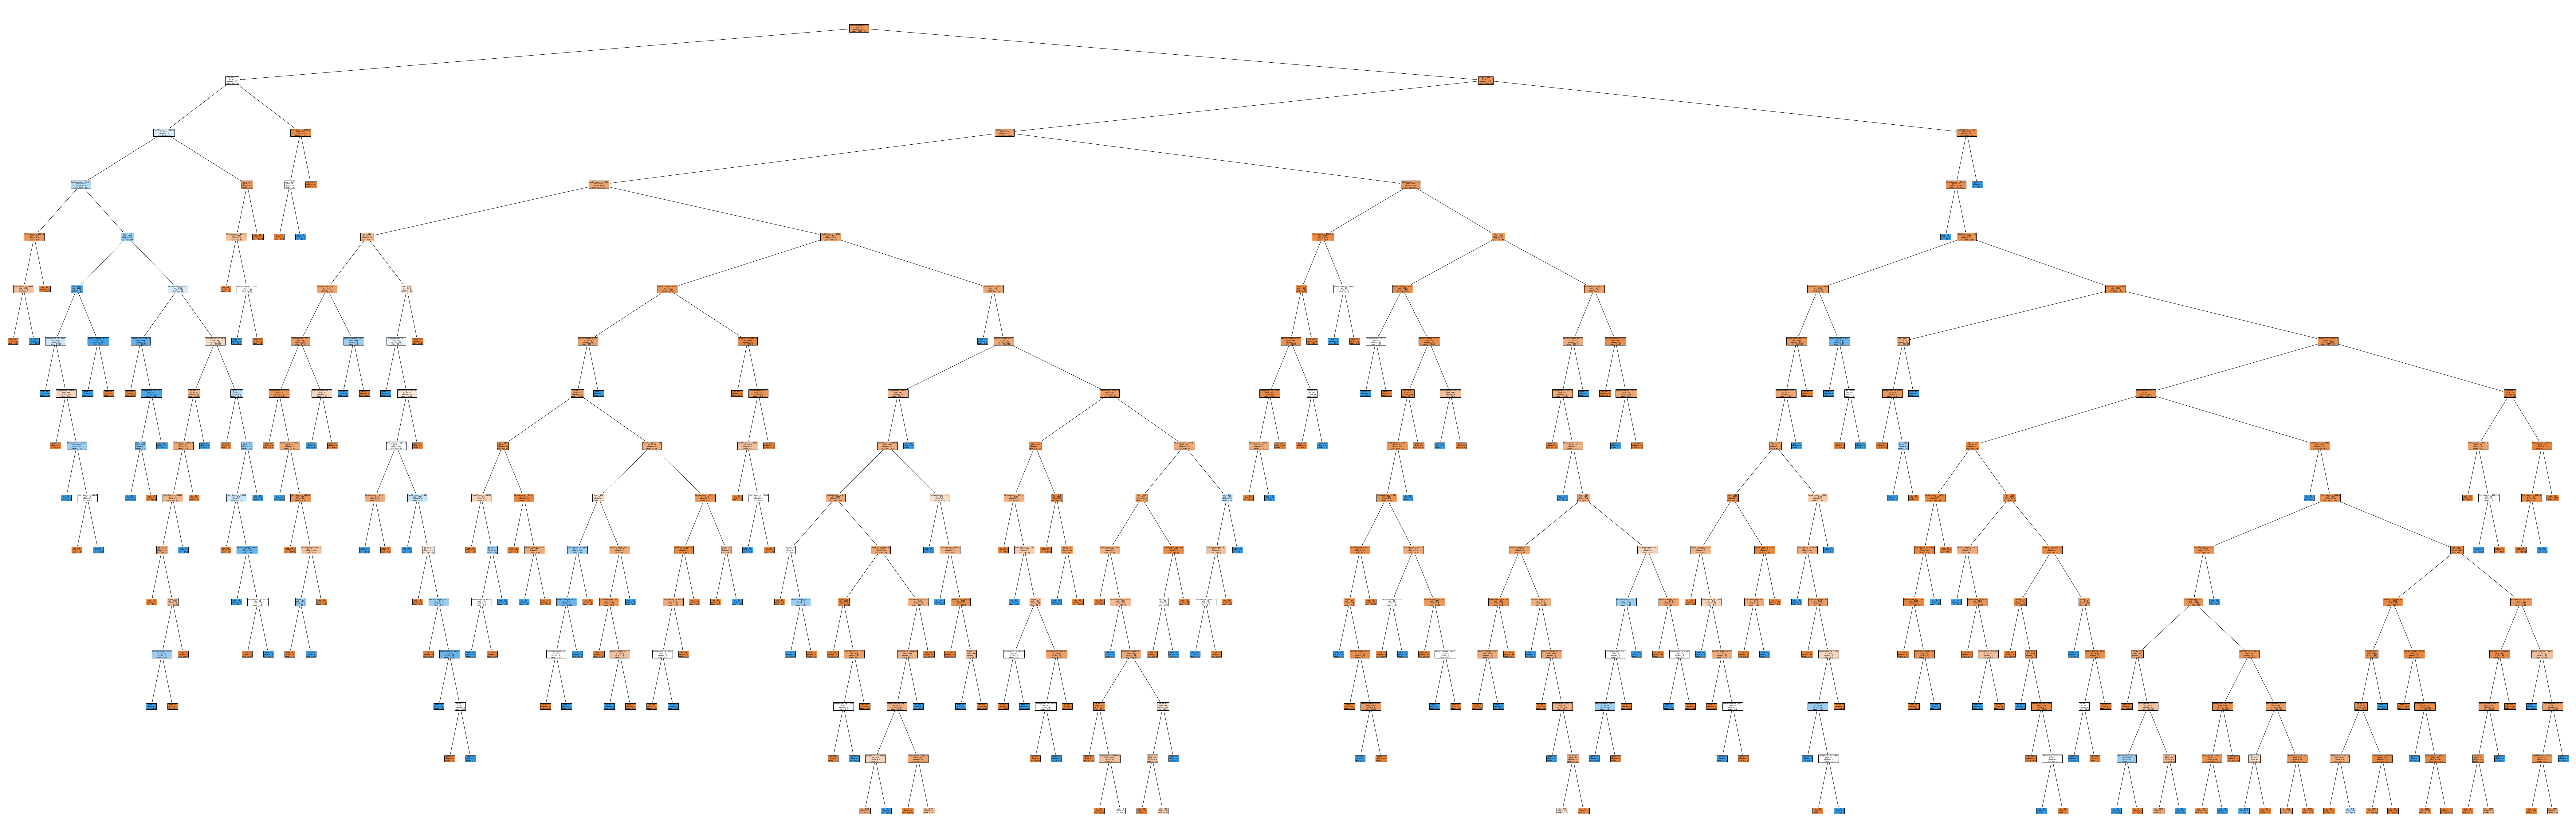

In [128]:
#tree visualization
fig = plt.figure(figsize=(150, 50))
_ = tree.plot_tree(tree_model_two, feature_names=['MonthlyIncome','Age','TotalWorkingYears'], filled=True)

In [129]:
fig.savefig("decision_tree_final.png")

In [130]:
#Print the accuracy
print(tree_model_two.score(X,y))

0.9585034013605442


### Rules of decision tree

1. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 25380, Monthly income less than or equal to 20,154, Monthly income less than or equal to 10380, employee has attrite and left the company
2. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 25380, age is less than or equal to 23.5, age less than or equal to 13.8, monthly income less than or equal to  25,380, monthly income less than or equal to  35,380, monthly income less than or equal to  55,380, monthly income less than or equal to  75,380, employee stayed in company
3. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380, total working years less than 3.5, employee left the company.
4. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380, total working years less than 3.5, monthly income is less than 25048,employee left the company
5. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380, total working years less than 3.5, monthly income is less than 25048, age is less than or eqaul to 28.5, employee stayed in company
6. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380,monthly income is less than 65,258, age less than 32.5, employee stayed in company
7. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380,monthly income is less than 65,258, age less than 32.5, monthly income less than or equal to 54K, monthly income less than or equal to 45K, age is less than or equal to 32.5, employee left the company
8. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, Monthly income less than or equal to 111380, Monthly income less than or equal to 55380,monthly income is less than 65,258, age less than 32.5, monthly income less than or equal to 54K, monthly income less than or equal to 45K, age is greater than or equal to 32.5,monthly income less than or equal to 50K, employee stayed in company else employee left
9. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, total working years is less than or equal to 39, monthly income is less than or equal to 10398, employee stayed in company, else if total working years isless than or equal to 5.5, monthly income is less than or equal to 15758,  monthly income is less than or equal to 11758, age is less than or equal to 32.5, monthly income less than or equal to 10,8554, employee left the company.
10. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, total working years is less than or equal to 39, monthly income is less than or equal to 10398, employee stayed in company, else monthly income is less than or equal to 20054, total working years is 28.5, age is 35.5, monthly income is less than or equal to 27045, age is less than or equal to 25.4, monthly income is less than or eqaul to 15,458, total working years is less than or eqaul to 4.5, age is less than or eqaul to 21, employee left the company.
11. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, total working years is less than or equal to 39, monthly income is less than or equal to 10398, employee stayed in company, else monthly income is less than or equal to 20054, total working years is 28.5, age is 35.5, monthly income is less than or equal to 27045, age is less than or equal to 25.4, monthly income is less than or eqaul to 15,458, employee stayed in company, else age is less than or equal to 15.5, monthly income is less than 58K, monthly income is less than 45K, monthly income is less than 33K, age is less than or eqaul to 38, age is less than or equal to 31, total working years is less than 35, monthly income is 55K, emplooyee stayed in company.
16. If total working hours is less than or equal to 1.5, age less than or equal to 3.5, total working years is less than or equal to 39, monthly income is less than or equal to 10398, employee stayed in company, else monthly income is less than or equal to 20054, total working years is 28.5, age is 35.5, monthly income is less than or equal to 27045, age is less than or equal to 25.4, monthly income is less than or eqaul to 15,458, employee stayed in company, else age is less than or equal to 15.5, monthly income is less than 58K, monthly income is less than 45K, monthly income is less than 33K, age is less than or eqaul to 38, age is less than or equal to 31, age is less than 24, monthly income is less than or equal to 15K, Monthly income is less thanor eqaul to 10k, total working years is less than 7.58, total working years is less than or equal to 5.5, employee stayed in company else, employee left the company.